# Artificial Bee Colony - Benchmarks

## The Rastrigin Function

In [1]:
# ---- IMPORT MODULES
%matplotlib inline
import numpy as np
from HiveVanilla import Hive
from HiveVanilla import Utilities
import matplotlib.pyplot as plt
from matplotlib import cm  # color map
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def anim_to_html(anim):
    plt.close(anim._fig)
    return anim.to_html5_video()

animation.Animation._repr_html_ = anim_to_html

#### Definition of the evaluation function to minimize

In [2]:
# ---- CREATE TEST CASE

def evaluator(vector):
    """
    A n-dimensional Rastrigin's function is defined as:

                            n
            f(x) = 10*n + Sigma { x_i^2 - 10*cos(2*PI*x_i) }
                           i=1

    where  -5.12 <= x_i <= 5.12.

    Thus the global minima of the function being f(x) = 0 at all x_i = 0.

    """

    vector = np.array(vector)

    return 10 * vector.size + sum(vector*vector - 10 * np.cos(2 * np.pi * vector))


#### 3D Visualisation

In [3]:
# ---- Plots the 2D Rastrigin function 

x=np.linspace(-5.12,5.12,50)
y=np.linspace(-5.12,5.12,50)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
Z = (xv**2 - 10 * np.cos(2 * np.pi * xv)) + (yv**2 - 10 * np.cos(2 * np.pi * yv)) + 20

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xv, yv, Z, cmap=cm.viridis)
ax.view_init(-8, 30)
ax.axis('off')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rastrigin Benchmark function')


def animate(i):
    ax.view_init(-8, 30 + 4*i)
    return []

animation.FuncAnimation(fig, animate, frames=40, interval=200, blit=True)




#### 2D Contour

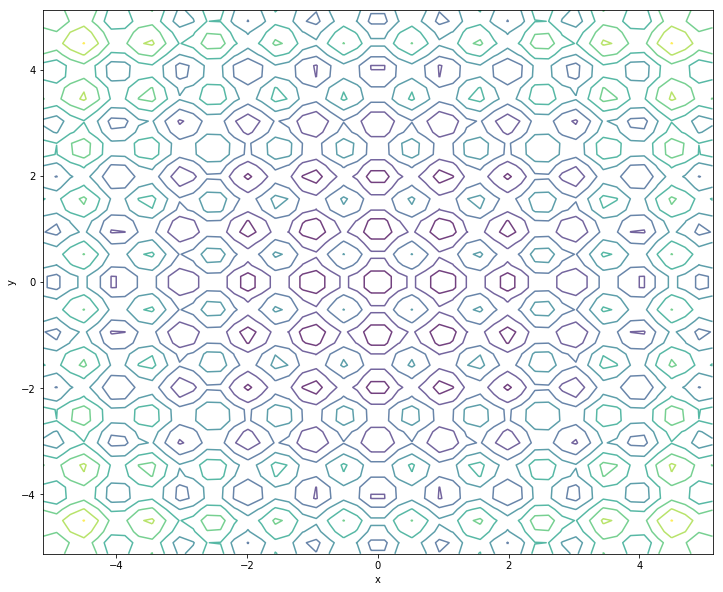

In [4]:
fig,ax = plt.subplots(figsize=(12,10))
ax.contour(xv,yv,Z,cmap=cm.viridis,alpha=.75)
plt.xlabel('x')
plt.ylabel('y')

#### Setting the algo parameters and running

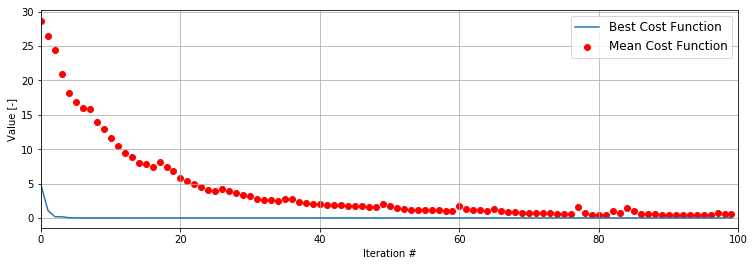

Fitness Value ABC: 2.6005864128819667e-12


In [5]:
def run():

    # creates model
    ndim = int(2)
    model = Hive.BeeHive(lower = [-5.12]*ndim  ,
                         upper = [ 5.12]*ndim  ,
                         fun       = evaluator ,
                         numb_bees =  50       ,
                         max_itrs  =  100       ,)

    # runs model
    cost = model.run()

    # plots convergence
    Utilities.ConvergencePlot(cost)

    # prints out best solution
    print("Fitness Value ABC: {0}".format(model.best))
    
    return model

sol=run()
rec=np.array(sol.record)
vals=sol.nectars
bests=sol.bests
n=len(vals[0])

#### Let's look at the nectar sources during the search 

In [6]:
# ------ Source location during search. The darker the point the better the source

rgba_colors = np.zeros((n,4))
particles=np.zeros(n,dtype=[("position", float , 2)])
rgba_colors[:, 3] = np.exp(-np.array(vals[0])*20)
particles["position"]=rec[0,:,:]
bestPart=bests[0]

fig,ax = plt.subplots(figsize=(12,10))
ax.contour(xv,yv,Z,cmap=cm.viridis,alpha=.75)
scatter=ax.scatter(particles["position"][:,0], particles["position"][:,1],c=rgba_colors,s=200)
scatterBest=ax.scatter(bestPart[0],bestPart[1],color='red',s=200)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sources location during search')

def update(frame_number):

    particles["position"] = rec[frame_number,:,:]
    bestPart=bests[frame_number]
    
    rgba_colors[:, 3] = np.exp(-np.array(vals[frame_number])*20)
    scatter.set_offsets(particles["position"])
    scatterBest.set_offsets(bestPart)
#    scatter.set_array(rgba_colors)
    return scatter, 

animation.FuncAnimation(fig, update, interval=150, frames=100) 


## Adaptation to Traveling Salesman Problem (TSB)

The definition of the Traveling Salesman problem is well formulated on Wikipedia : https://en.wikipedia.org/wiki/Travelling_salesman_problem 

"Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" 

Import the modified Hive code specific to the TBS

In [7]:
from Hive import Utilities
from Hive import Hive
import csv


The following lines read the data specific to the traveling salesman problem. In this example we chose to use 29 cities that are located in Western Sahara in order to keep the problem simple so it can be run reasonnably fast. Other cities corresponding to other countries can be found on http://www.math.uwaterloo.ca/tsp/world/countries.html

In [8]:
f = open('datasahara.csv','r')
data = np.array(list(csv.reader(f, delimiter=' ',quoting=csv.QUOTE_NONNUMERIC)))
data[:,0]=data[:,0]-1
#cities=data[0:5,:] #8387.077130278542
cities=data
nc=len(cities[:,0])
f.close()


The cities are then plotted :

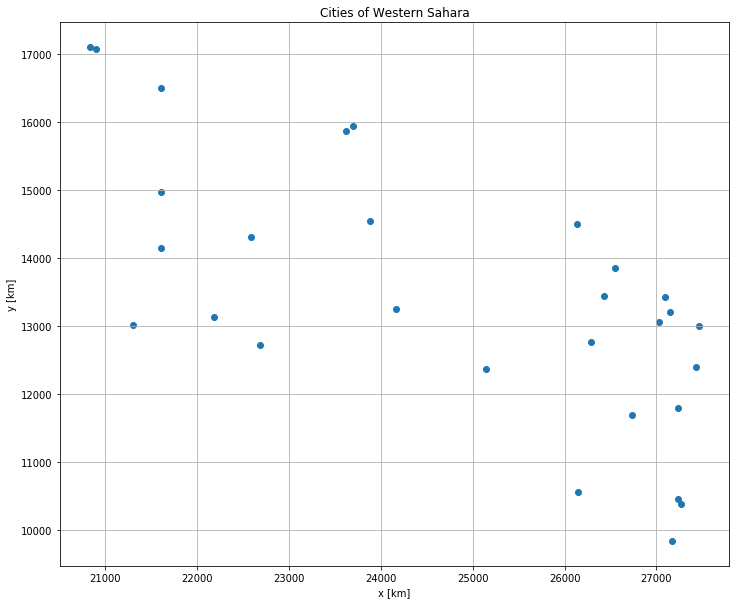

In [9]:
fig = plt.figure(figsize=(12,10))
plt.scatter(cities[:,1],cities[:,2])
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.title('Cities of Western Sahara')

Definition of the evaluation function for a certain path

In [10]:
def evaluator(path,cities=cities):
  d = 0.0  # total distance between cities
  for i in range(len(path)-1):
      d+=((cities[path[i+1],1]-cities[path[i],1])**2+(cities[path[i+1],2]-cities[path[i],2])**2)**0.5
  
  d+=((cities[path[0],1]-cities[path[-1],1])**2+(cities[path[0],2]-cities[path[-1],2])**2)**0.5

#  minDist = 27603
  return d

Finding the solution

Fitness Value ABC: 27601.173774493764


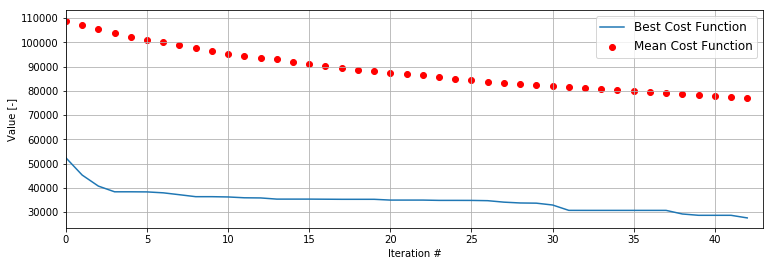

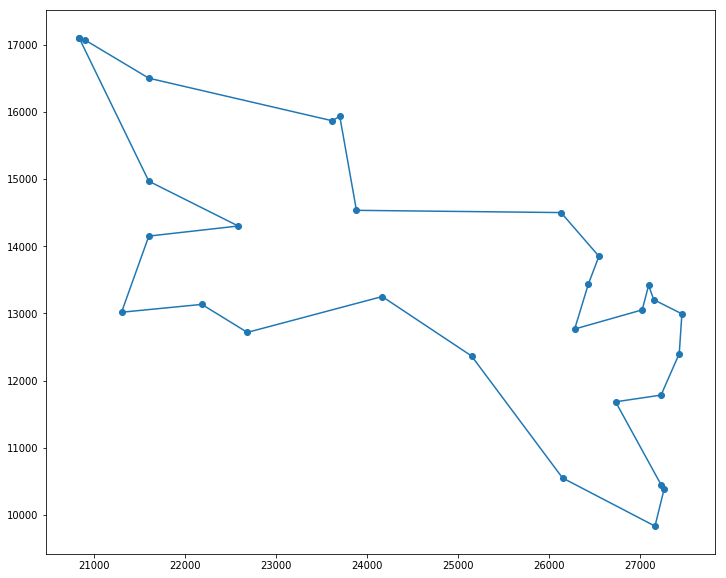

In [11]:
def run():

    # creates model
    ndim = int(nc)
    model = Hive.BeeHive(lower     = [0] *ndim ,
                         upper     = [nc]*ndim ,
                         fun       = evaluator ,
                         numb_bees =  200       ,
                         max_itrs  =  500       ,
                         verbose = False,
                         bestDist=27603)

    # runs model
    cost = model.run()

    # plots convergence
    Utilities.ConvergencePlot(cost)

    # prints out best solution
    print("Fitness Value ABC: {0}".format(model.best))
    
    return model

model=run()
rec=np.array(model.record)
bestPath=model.solution
x=[]
y=[]

for p in bestPath : 
    x.append(cities[p,1])
    y.append(cities[p,2])

x.append(cities[bestPath[0],1])
y.append(cities[bestPath[0],2])

fig1=plt.figure(figsize=(12,10))
plt.plot(x,y)
plt.scatter(x,y)

Create animation

In [12]:
fig = plt.figure(figsize=(12, 10))
ax=fig.gca()
xbest=[]
ybest=[]

for i in range(len(rec[:,0])):
    xep=[]
    yep=[]
    for p in rec[i,:] :
        xep.append(cities[p,1])
        yep.append(cities[p,2])
    xep.append(cities[rec[i,0],1])
    yep.append(cities[rec[i,0],2])
    xbest.append(xep)
    ybest.append(yep)

line,=ax.plot(xbest[0],ybest[0])
scatter=ax.scatter(xbest[0],ybest[0])

def update(frame_number):

    line.set_data(xbest[frame_number],ybest[frame_number])
    return line,


animation.FuncAnimation(fig, update, interval=1000, frames=len(rec[:,0]),blit=False)